# Getting Started: Training a Neural Network to Act as an XOR gate

This is a minimal example about how you can use common data science libraries in RHODS to train an AI model.

## Data Loading

Read the data from a CSV file by using Pandas.
Pandas loads the data into a `DataFrame` object:

In [55]:
import pandas as pd

data = pd.read_csv("xor.csv")

Inspect the data.

The XOR gate receives 2 input values and returns one output.
The gate returns `1` (or `true`) when the 2 input values are different.
Othewise, the gate returns `0` (or `false`).

The first unnamed column is the dataframe index. You can ignore the index in this example.

In [56]:
data

,Input 1,Input 2,Output
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


## Data Inspection

After loading the data, you can  explore the cases, for example, by gathering basic metrics:

In [57]:
data.describe()

,Input 1,Input 2,Output
count,4.00000,4.00000,4.00000
mean,0.50000,0.50000,0.50000
std,0.57735,0.57735,0.57735
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.50000,0.50000,0.50000
75%,1.00000,1.00000,1.00000
max,1.00000,1.00000,1.00000


You can also create data visualizations with libraries such as `matplotlib` to discover patterns and correlations:

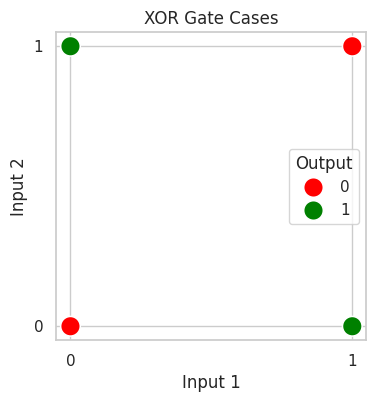

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set graph style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(4, 4))
plot = sns.scatterplot(
    x='Input 1',
    y='Input 2',
    hue='Output',
    data=data,
    palette={0: "red", 1: "green"},
    s=200
)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.title('XOR Gate Cases')
plt.show()

## Data Preparation

Typically, you must prepocess, clean, normalize, and prepare the data in a format that is suitable for the library and the model that you are training.
You must also split the data into input and output data.

In most cases, you would also split the data into training, test, validation subsets, so that you can evaluate the performance of your model after training.

In this case, for the sake of simplicity, just split the data into inputs and output.

To select the inputs, select all rows (`:`) and the first two columns (`:2`):

In [59]:
inputs = data.iloc[:, :2]
inputs

,Input 1,Input 2
0,0,0
1,0,1
2,1,0
3,1,1


To select the output, pick the last column:

In [60]:
output = data.iloc[:, -1:]
output

,Output
0,0
1,1
2,1
3,0


## Training

After your data is clean and ready, you can create and train your model.

In this case, the exercise uses a simple neural network by using the `tensorflow` and `keras` libraries.

In [61]:
from keras.layers import Dense
from keras.models import Sequential

# Define a sequential neural network
model = Sequential([
    Dense(8, input_dim=2, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(inputs, output, epochs=1000)

Epoch 1/1000


1/1 [==============================] - 0s 456ms/step - loss: 0.7212 - accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7205 - accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7197 - accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7173 - accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7165 - accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7157 - accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.7500
Epoch 11/1000
1/1 [===========

The model is now trained.

## Evaluation

After training, evaluate your model.
Typically you should use a dedicated test subset to evaluate the model, but this simple case uses the same training data for testing.

In [62]:
loss, accuracy = model.evaluate(inputs, output)
print("Model accuracy:", accuracy)

1/1 [==============================] - 0s 83ms/step - loss: 0.2004 - accuracy: 1.0000
Model accuracy: 1.0


Note that, because you have used only few cases for training, the accuracy of the trained model might not be very high.

Real training scenarios tend to use many more cases than this one.

In [64]:
predictions = model.predict(inputs)
expected_predictions = output.to_numpy()
rounded_predictions = [int(round(p[0])) for p in predictions]

# Print the predicted values
print("Predictions:")
print("Expected\tPredicted")
print("-------------------------")
for input_val, output_val in zip(expected_predictions, rounded_predictions):
    print(f"{input_val[0]}\t\t{output_val}")

1/1 [==============================] - 0s 15ms/step


AttributeError: 'int' object has no attribute 'to_numpy'